In [1]:
import pandas as pd

import numpy as np


In [2]:
hb=pd.read_csv(r"C:\python\headbrain.csv")


In [3]:
hb.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
hb.isnull().sum()[hb.isnull().sum()>0]

Series([], dtype: int64)

In [5]:
hb.select_dtypes(include='object').columns

Index([], dtype='object')

In [6]:
def remove_outliers(df,col,k):
    mean=df[col].mean()
    global df1
    sd = df[col].std()
    final_list=[x for x in df[col] if (x>mean-k*sd)]
    final_list=[x for x in final_list if (x<mean+k*sd)]
    df1=df.loc[df[col].isin(final_list)]; print(df1.shape)
    print("Number of outliers removed-->",df.shape[0]-df1.shape[0])

In [7]:
remove_outliers(hb,'Brain Weight(grams)',2)

(225, 4)
Number of outliers removed--> 12


In [8]:
def remove_outliers(df,col,k):
    mean=df[col].mean()
    global df1
    sd = df[col].std()
    final_list=[x for x in df[col] if (x>mean-k*sd)]
    final_list=[x for x in final_list if (x<mean+k*sd)]
    df1=df.loc[df[col].isin(final_list)]; print(df1.shape)
    print("Number of outliers removed-->",df.shape[0]-df1.shape[0])

In [9]:
remove_outliers(hb,'Brain Weight(grams)',2)

(225, 4)
Number of outliers removed--> 12


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_hb,test_hb=train_test_split(hb,test_size=.2)

In [12]:
train_hb_x=train_hb.iloc[:,0:-1]
train_hb_y=train_hb.iloc[:,-1]

In [13]:
test_hb_x=test_hb.iloc[:,0:-1]
test_hb_y=test_hb.iloc[:,-1]

In [14]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(train_hb_x,train_hb_y)

LinearRegression()

In [15]:
Rsquare=linreg.score(train_hb_x,train_hb_y) 
Rsquare

0.6788532527146681

In [16]:
N=train_hb_x.shape[0]
K=train_hb_x.shape[1]
Adj_Rsqu=1-(1-Rsquare) *(N-1)/(N-K-1)
Adj_Rsqu

0.6736454676235546

In [17]:
pred_train=linreg.predict(train_hb_x)
pred_test=linreg.predict(test_hb_x)

In [18]:
act_pred_train=pd.DataFrame()
act_pred_train['Actual']=train_hb_y
act_pred_train['Pred']=pred_train

In [19]:
act_pred_test=pd.DataFrame()
act_pred_test['Actual']=test_hb_y
act_pred_test['Pred']=pred_test

In [20]:
error_train=train_hb_y-pred_train
error_train.mean()

-4.090320087338566e-14

In [21]:
error_test=test_hb_y-pred_test
error_test.mean()

9.828368003425235

In [22]:
import numpy as np

In [23]:
mse_train=np.mean(np.square(error_train))
mse_test=np.mean(np.square(error_test))
print('mse_train is ',mse_train)
print('mse_tes is ',mse_test)

mse_train is  4945.564178215524
mse_tes is  5565.94425087309


In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [25]:
print(mean_squared_error(act_pred_train['Actual'],act_pred_train['Pred']))
print(mean_squared_error(act_pred_test['Actual'],act_pred_test['Pred']))

4945.564178215524
5565.94425087309


In [26]:
print(mean_absolute_error(act_pred_train['Actual'],act_pred_train['Pred']))
print(mean_absolute_error(act_pred_test['Actual'],act_pred_test['Pred']))

54.950173398272156
59.62803010257684


In [27]:
print(mean_absolute_percentage_error(act_pred_train['Actual'],act_pred_train['Pred'])*100)
print(mean_absolute_percentage_error(act_pred_test['Actual'],act_pred_test['Pred'])*100)

4.278268401573174
4.580635061072828


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

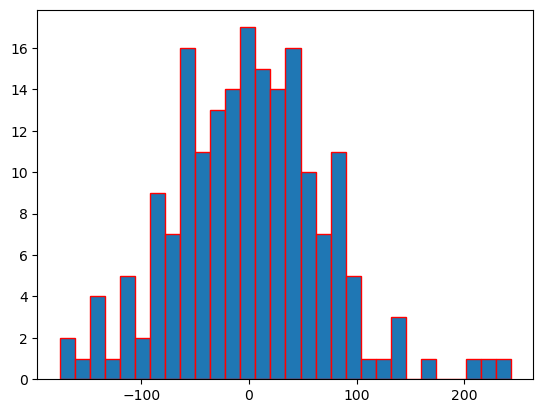

In [33]:
plt.hist(error_train,bins=30,edgecolor='red');

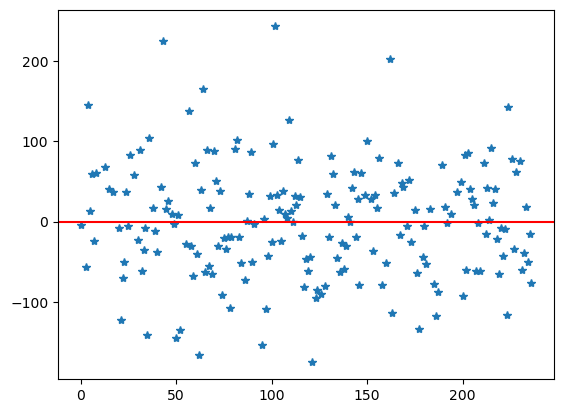

In [30]:
plt.plot(error_train,'*')
plt.axhline(y=0, color='red')


<Axes: xlabel='Actual', ylabel='Pred'>

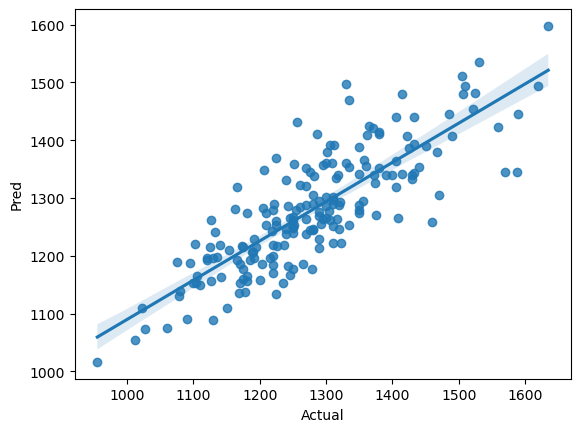

In [31]:
sns.regplot(x='Actual',y='Pred',data=act_pred_train)

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

In [41]:
mean_absolute_error(test_hb_y,pred_test)

59.62803010257684

In [42]:
mean_squared_error(test_hb_y,pred_test)

5565.94425087309

In [43]:
mean_absolute_percentage_error(test_hb_y,pred_test)

0.045806350610728276

In [48]:
r2_score(test_hb_y,pred_test)

0.4653346291162864